In [1]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
import cmocean
from xgcm import Grid
import gcm_filters

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


## Reading in data for parameterized runs:


In [3]:


## MEKE_VISCOSITY_COEFF_KU = -0.2; MEKE_KHCOEFF = 0
%cd /glade/scratch/bachman/NeverWorld2/simulations/Limited_BS_1deg_limiter_as_BS_0.7_fix
fs=xr.open_dataset('static.nc', decode_times=False)
#%ls
os = xr.open_dataset('ocean.stats.nc', decode_times=False)
area_t=fs['area_t']

xh = fs.xh
yh = fs.yh

grid = Grid(fs, coords={'X': {'center': 'xh', 'outer': 'xq'},
                        'Y': {'center': 'yh', 'outer': 'yq'}});
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/



/glade/scratch/eyankovsky/Backscatter_tests/MEKE_BS_1deg
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [3]:
%cd /glade/scratch/bachman/NeverWorld2/simulations/Limited_BS_1deg_limiter_as_BS_0.7_fix


test = np.linspace(1,30001,1001)
#test = np.linspace(30601,35971,180)
#test = np.linspace(30601,30631,2)
KElow=test*0
KEhigh=test*0
for step,i in enumerate(test):
    print(int(i))
    u = grid.interp(xr.open_dataset('snapshots_%08d.nc'%i, decode_times=False)['u'],axis='X');
    v = grid.interp(xr.open_dataset('snapshots_%08d.nc'%i, decode_times=False)['v'],axis='Y');
    h = xr.open_dataset('snapshots_%08d.nc'%i, decode_times=False)['h']
    KE = (0.5*(u**2+v**2)*h*area_t*1022.6).sum('zl').stack(k=("xh", "yh"))[0,:]
    qt = KE.quantile([.90], dim='k', interpolation='linear')
    KElow[step] = np.nansum(KE.where(KE<qt))
    KEhigh[step] = np.nansum(KE.where(KE>qt))

/glade/scratch/bachman/NeverWorld2/simulations/Limited_BS_1deg_limiter_as_BS_0.7_fix


In [4]:
print('done')

done


Text(0.5, 1.0, 'Kinetic Energy')

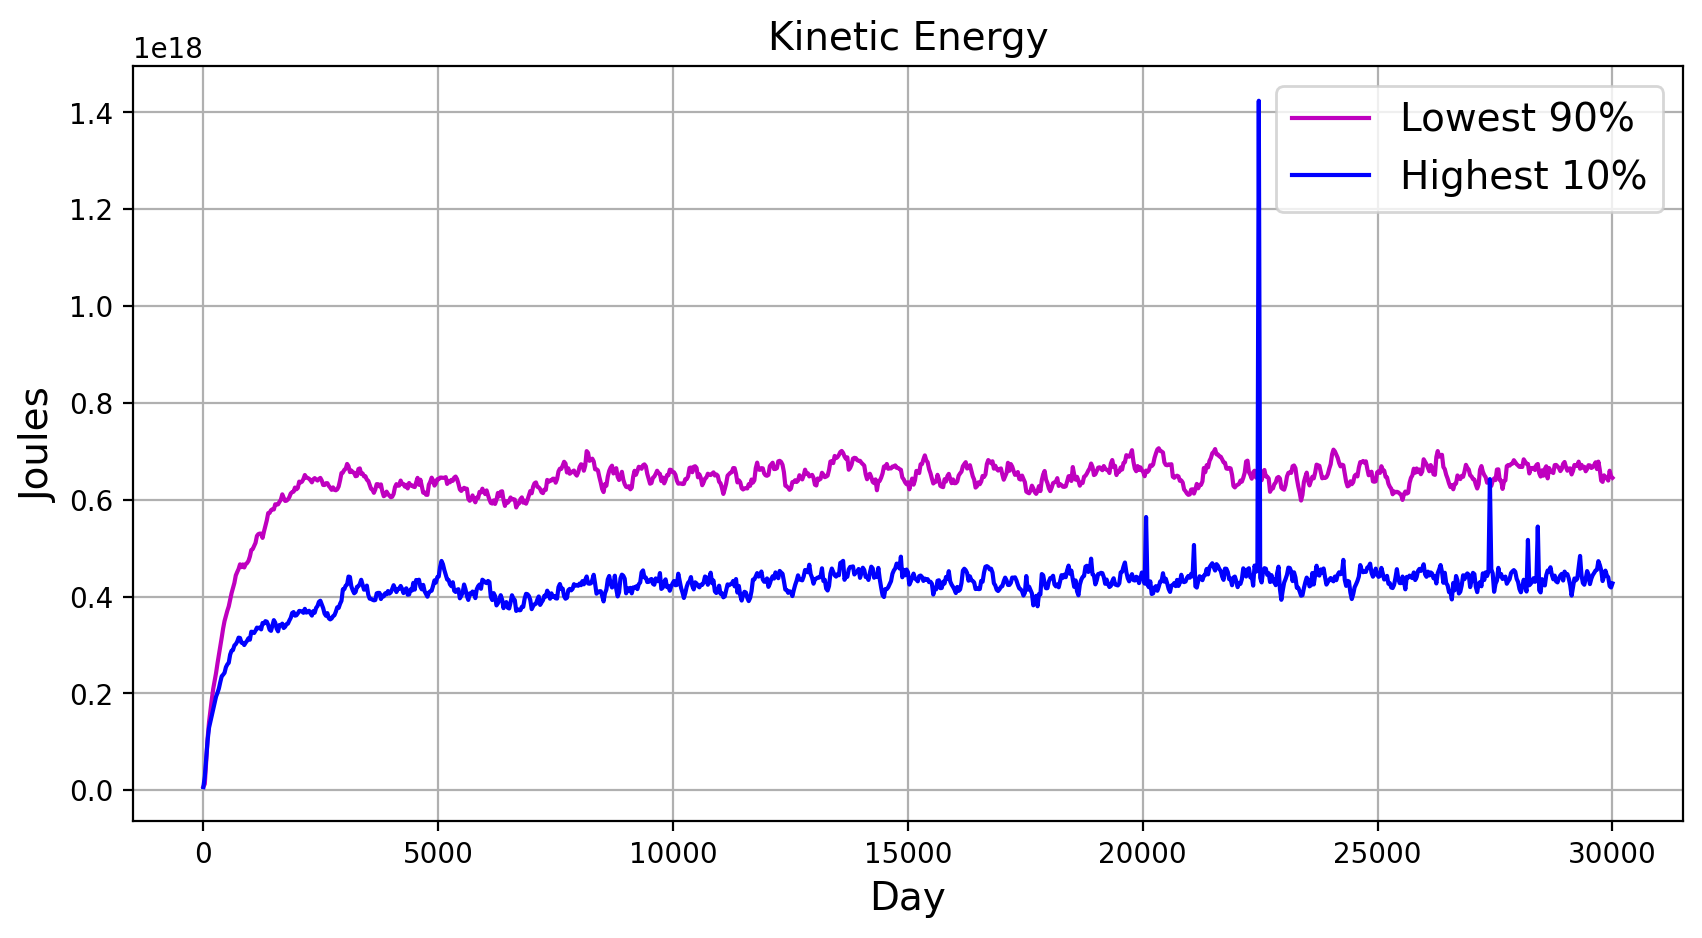

In [5]:

plt.figure(figsize=(10, 5), dpi= 200, facecolor='w', edgecolor='k')
plt.plot(test,KElow,'m')
plt.plot(test,KEhigh,'b')

plt.grid()

plt.legend(['Lowest 90%','Highest 10%'],fontsize=14)
# plt.plot([0, 0],[0, 1],'--',color=[0,0,0])
# plt.xlim(-65, 65)
#plt.ylim(0,1.5e18);
plt.xlabel('Day',fontsize=14)
plt.ylabel('Joules',fontsize=14)
plt.title('Kinetic Energy',fontsize=14)

In [104]:
## SANITY CHECK:

qt = KE[:].quantile([.5], dim='k', interpolation='linear')
#print(qt.shape)
#print(qt)
KElow = KE.where(KE<qt).values
KEhigh = KE.where(KE>qt).values

KElow = KElow[~np.isnan(KElow)]
KEhigh = KEhigh[~np.isnan(KEhigh)]

print(KElow.shape)
print(KEhigh.shape)
print('you can see the sizes are equal which is good!')

(4200,)
(4200,)
you can see the sizes are equal which is good!


In [39]:
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.25deg_N15_baseline_hmix5/
fs_025 = xr.open_dataset('static.nc', decode_times=False)
av_025 = xr.open_dataset('averages_00031502.nc', decode_times=False)  
grid_025 = Grid(fs_025, coords={'X': {'center': 'xh', 'outer': 'xq'},
                        'Y': {'center': 'yh', 'outer': 'yq'}});
area_025=fs_025['area_t']


%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.125deg_N15_baseline_hmix5/
fs_0125 = xr.open_dataset('static.nc', decode_times=False)
av_0125 = xr.open_dataset('averages_00004502.nc', decode_times=False)
grid_0125 = Grid(fs_0125, coords={'X': {'center': 'xh', 'outer': 'xq'},
                        'Y': {'center': 'yh', 'outer': 'yq'}});
area_0125=fs_0125['area_t']

%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.0625deg_N15_baseline_hmix5/
fs_00625 = xr.open_dataset('static.nc', decode_times=False)
av_00625 = xr.open_dataset('averages_00004502.nc', decode_times=False)
grid_00625 = Grid(fs_00625, coords={'X': {'center': 'xh', 'outer': 'xq'},
                        'Y': {'center': 'yh', 'outer': 'yq'}});
area_00625=fs_00625['area_t']

%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.03125deg_N15_baseline_hmix5/
fs_003125 = xr.open_dataset('static.nc', decode_times=False)
av_003125 = xr.open_dataset('averages_00002702.nc', decode_times=False)
grid_003125 = Grid(fs_003125, coords={'X': {'center': 'xh', 'outer': 'xq'},
                        'Y': {'center': 'yh', 'outer': 'yq'}});
area_003125=fs_003125['area_t']

%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/campaign/univ/unyu0004/NeverWorld2/nw2_0.25deg_N15_baseline_hmix5
/glade/campaign/univ/unyu0004/NeverWorld2/nw2_0.125deg_N15_baseline_hmix5
/glade/campaign/univ/unyu0004/NeverWorld2/nw2_0.0625deg_N15_baseline_hmix5
/glade/campaign/univ/unyu0004/NeverWorld2/nw2_0.03125deg_N15_baseline_hmix5
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [5]:
%cd /glade/scratch/bachman/NeverWorld2/simulations/Limited_BS_1deg_limiter_as_BS_0.7_fix
fs_Scottfix = xr.open_dataset('static.nc', decode_times=False)
av_Scottfix = xr.open_dataset('snapshots_00035941.nc', decode_times=False)
grid_1 = Grid(fs_Scottfix, coords={'X': {'center': 'xh', 'outer': 'xq'},
                        'Y': {'center': 'yh', 'outer': 'yq'}});
area_1=fs_Scottfix['area_t']


%cd /glade/p/univ/unyu0004/eyankovsky/MEKE_testing/default_noparameterization
fs_05 = xr.open_dataset('static.nc', decode_times=False)
av_05 = xr.open_dataset('averages_00031502.nc', decode_times=False)  
grid_05 = Grid(fs_05, coords={'X': {'center': 'xh', 'outer': 'xq'},
                        'Y': {'center': 'yh', 'outer': 'yq'}});
area_05=fs_05['area_t']


/glade/scratch/bachman/NeverWorld2/simulations/Limited_BS_1deg_limiter_as_BS_0.7_fix
/glade/p/univ/unyu0004/eyankovsky/MEKE_testing/default_noparameterization


In [12]:
%cd /glade/scratch/eyankovsky/Scale_awareness_tests/MEKE_GM_0.5deg
fsGM3 = xr.open_dataset('static.nc', decode_times=False)
osGM3 = xr.open_dataset('ocean.stats.nc', decode_times=False)
av_GM3 = xr.open_dataset('averages_00031502.nc', decode_times=False)  

%cd /glade/scratch/eyankovsky/Scale_awareness_tests/MEKE_BS_0.5deg
fsBS3 = xr.open_dataset('static.nc', decode_times=False)
osBS3 = xr.open_dataset('ocean.stats.nc', decode_times=False)
av_BS3 = xr.open_dataset('averages_00031502.nc', decode_times=False)  

%cd /glade/scratch/eyankovsky/Scale_awareness_tests/MEKE_GM_BS_0.5deg
fsGMBS3 = xr.open_dataset('static.nc', decode_times=False)
osGMBS3 = xr.open_dataset('ocean.stats.nc', decode_times=False)
av_GMBS3 = xr.open_dataset('averages_00031502.nc', decode_times=False)  

%cd /glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Half_degree/05deg_KS01_COEF01
fsScott1 = xr.open_dataset('static.nc', decode_times=False)
osScott1 = xr.open_dataset('ocean.stats.nc', decode_times=False)
av_Scott1 = xr.open_dataset('averages_00031502.nc', decode_times=False)  

%cd /glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Half_degree/05deg_KS01_COEF05
fsScott2 = xr.open_dataset('static.nc', decode_times=False)
osScott2 = xr.open_dataset('ocean.stats.nc', decode_times=False)
av_Scott2 = xr.open_dataset('averages_00031502.nc', decode_times=False)  

%cd /glade/scratch/eyankovsky/Scale_awareness_tests/MEKE_BS_1deg
fsBS1deg = xr.open_dataset('static.nc', decode_times=False)
osBS1deg = xr.open_dataset('ocean.stats.nc', decode_times=False)
av_BS1deg = xr.open_dataset('averages_00031502.nc', decode_times=False)  
grid_1 = Grid(fsBS1deg, coords={'X': {'center': 'xh', 'outer': 'xq'},
                        'Y': {'center': 'yh', 'outer': 'yq'}});

%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/scratch/eyankovsky/Scale_awareness_tests/MEKE_GM_0.5deg
/glade/scratch/eyankovsky/Scale_awareness_tests/MEKE_BS_0.5deg
/glade/scratch/eyankovsky/Scale_awareness_tests/MEKE_GM_BS_0.5deg
/glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Half_degree/05deg_KS01_COEF01
/glade/scratch/eyankovsky/Backscatter_tests_with_Scott/Half_degree/05deg_KS01_COEF05
/glade/scratch/eyankovsky/Scale_awareness_tests/MEKE_BS_1deg
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [132]:
#Scott's run:
u = grid.interp(av_Scottfix['u'][0:5],axis='X').mean('time');
v = grid.interp(av_Scottfix['v'][0:5],axis='Y').mean('time');
h = (av_Scottfix['h'][0:5]).mean('time');
KE = (0.5*(u**2+v**2))[0]#*h*area_1*1022.6).sum('zl')
KE_stack = KE.stack(k=("xh", "yh"))
bins = np.linspace(0,1.5e15,31)

# plt.figure(figsize=(5, 5), dpi= 100, facecolor='w', edgecolor='k')
# plt.hist(KE_stack,bins=bins)

# plt.grid()


# # plt.plot([0, 0],[0, 1],'--',color=[0,0,0])
# plt.xlim(0., 1.e15)
# #plt.ylim(0,1.5e18);
# plt.xlabel('KE [Joules]',fontsize=14)
# plt.ylabel('Count',fontsize=14)
# plt.title('Kinetic Energy, 1 deg. (1 deg, KS=0.2, COEF=0.7)',fontsize=14)

In [13]:
#Other runs:

u = (grid_1.interp(av_BS1deg['u'][-1],axis='X'))
v = (grid_1.interp(av_BS1deg['v'][-1],axis='Y'))

KE_BS1deg = (0.5*(u**2+v**2))[0]#*h*area_coarse*1022.6*scale*scale).sum('zl')
KE_BS1deg_stack = KE_BS1deg.stack(k=("xh", "yh"))
print('done')

done


In [ ]:
50000/2000

In [170]:
#Other runs:
scale=16

u = (grid_003125.interp(av_003125['u'][-1],axis='X')).coarsen(xh=scale,yh=scale, boundary="exact").mean();
v = (grid_003125.interp(av_003125['v'][-1],axis='Y')).coarsen(xh=scale,yh=scale, boundary="exact").mean();
h = (av_003125['h'][-1]).coarsen(xh=scale,yh=scale, boundary="exact").mean();
area_coarse = area_003125.coarsen(xh=scale,yh=scale, boundary="exact").mean()
KE_003125 = (0.5*(u**2+v**2))[0]#*h*area_coarse*1022.6*scale*scale).sum('zl')
KE_003125_stack = KE_003125.stack(k=("xh", "yh"))

print('done')



done


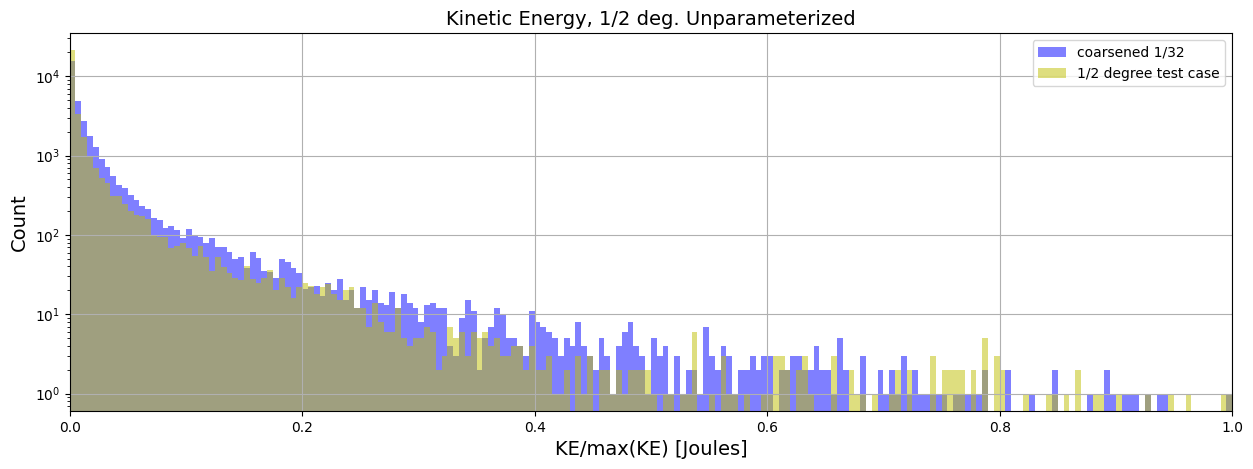

In [180]:
bins = np.linspace(0,1,201)

plt.figure(figsize=(15, 5), dpi= 100, facecolor='w', edgecolor='k')

plt.hist(KE_003125_stack/np.nanmax(KE_003125_stack),bins=bins,color='b',alpha=0.5)
plt.hist(KE_05_stack/np.nanmax(KE_05_stack),bins=bins,color='y',alpha=0.5)

plt.grid()


#plt.plot([0, 0],[0, 1],'--',color=[0,0,0])
plt.xlim(0., 1.)
#plt.ylim(0,25);
plt.yscale('log')
plt.xlabel('KE/max(KE) [Joules]',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Kinetic Energy, 1/2 deg. Unparameterized',fontsize=14)
plt.legend(['coarsened 1/32','1/2 degree test case'])

In [1]:
#Plotting KE 
fig = plt.figure(figsize=(4, 7), dpi=100, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_title('KE Original BS 1$^\circ$',fontsize=14)

ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)
#ax2.set_title('$log_{10}(m^2/s^2)$',fontsize=11)


levels=np.linspace(-5,0,11)
plotted =ax1.contourf(KE_GMBS1deg.xh,KE_GMBS1deg.yh,np.log10(KE_GMBS1deg),cmap=cmocean.cm.matter_r,levels=levels,extend='both',vmin=-5,vmax=0)

ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
#
plt.show()

NameError: name 'plt' is not defined

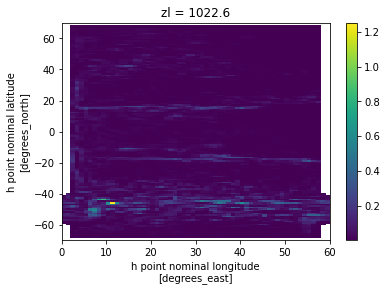